In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("airline-passengers.csv", parse_dates=[' Month '], index_col=' Month ')
print("Data Head:\n",df.head())

Data Head:
             Passengers
 Month                
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [3]:
quarterly=df.resample('Q').mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_1028\3007754263.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly=df.resample('Q').mean()


In [4]:
decomposition= seasonal_decompose(df,model='multiplicative')

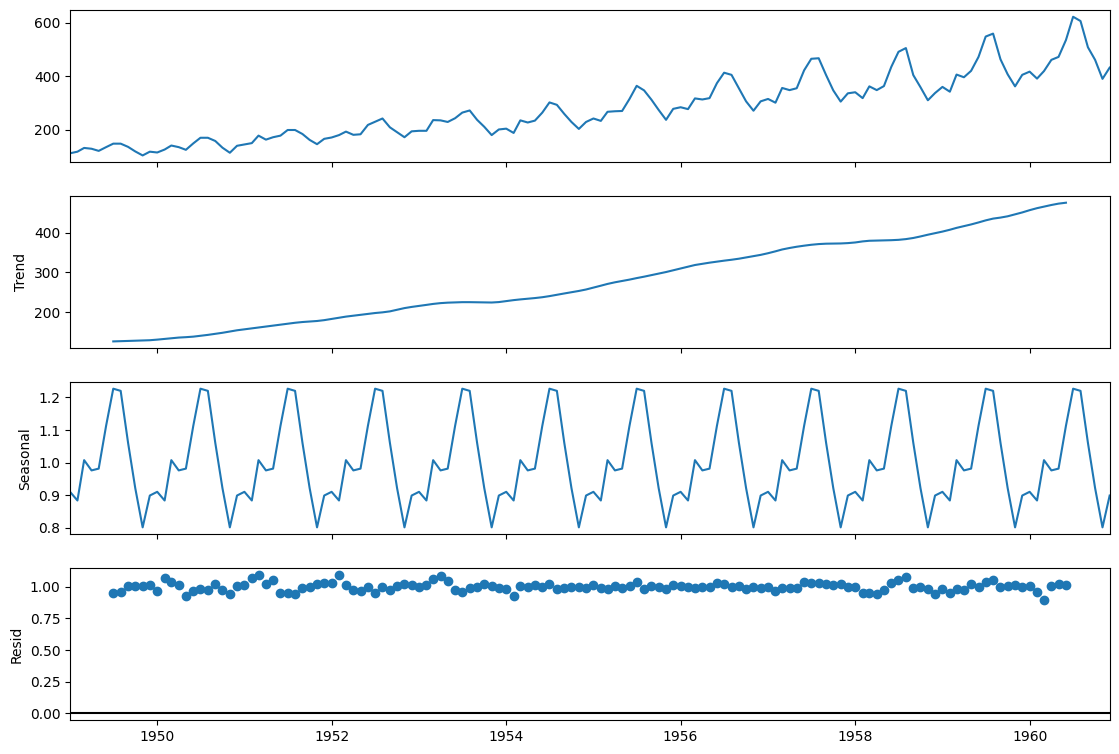

In [5]:
fig=decomposition.plot()
fig.set_size_inches(12,8)
plt.show()

In [6]:
df['MA_6']=df['Passengers'].rolling(window=6).mean()
df['MA_12']=df['Passengers'].rolling(window=12).mean()

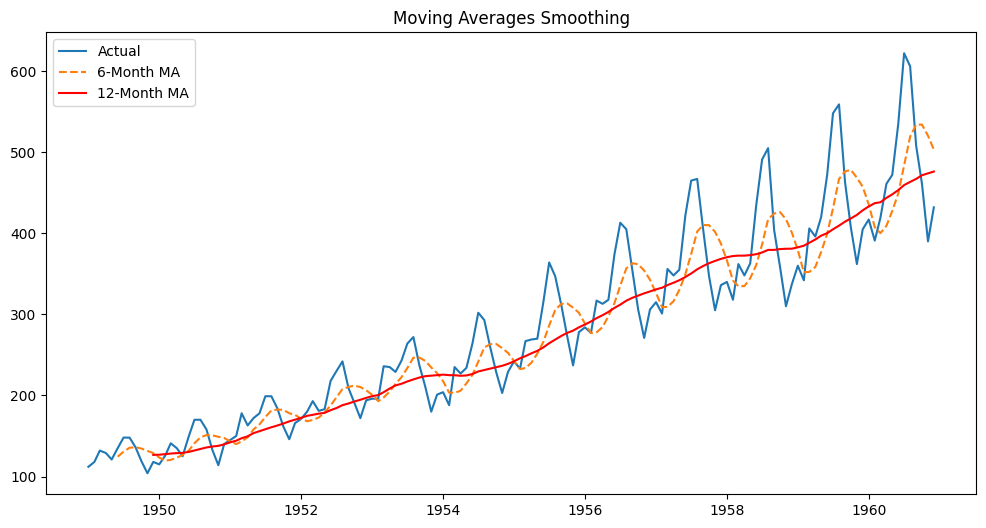

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'],label='Actual')
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--')
plt.plot(df['MA_12'],label='12-Month MA',color='red')
plt.legend();plt.title('Moving Averages Smoothing');

In [8]:
train=df.iloc[:-12]
test=df.iloc[-12:]

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Passengers'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ad

In [10]:
forecast=result.forecast(steps=12)
rmse=np.sqrt(mean_squared_error(test['Passengers'],forecast))
print(f"RMSE:{rmse:.1f} passengers")

RMSE:21.2 passengers


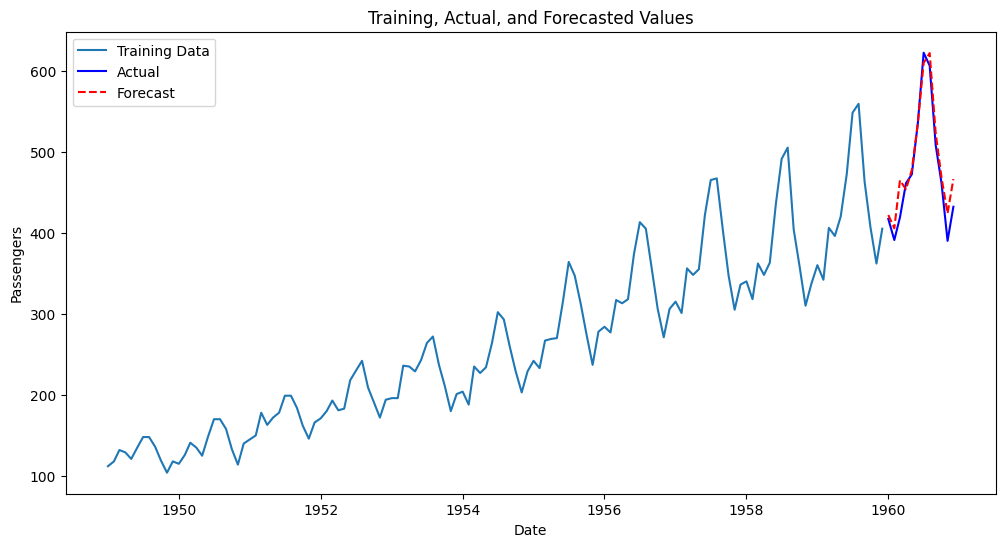

In [13]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Training, Actual, and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()